# Keras를 활용한 심층 신경망 실습 - 보스턴 주택가격 회귀 계측

In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow import keras

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# 랜덤 씨드 고정
SEED =12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [4]:
# 데이터 수집 및 전처리
from sklearn.datasets import fetch_openml

boston = fetch_openml('boston')

X = boston.data
y = boston.target

# 딥러닝 모델 성능 개선을 위한 피처 스케일링 (MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 학습-검증 데이터셋 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,
                                                    shuffle=True,
                                                    random_state=SEED)

In [5]:
# 모델 구조 구현(심층 신경망)
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(13, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

In [6]:
# 모델 구조 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


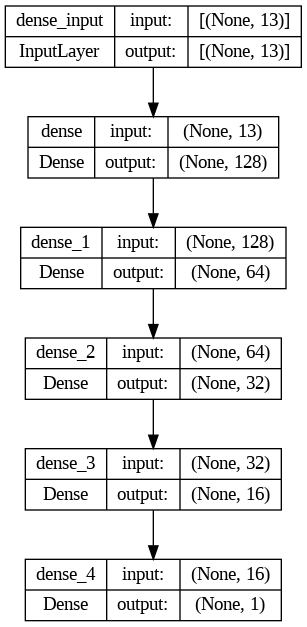

In [7]:
# 모델 구조 시각화
from keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True)

In [8]:
# 모델 컴파일
model.compile(loss='mse', optimizer='adam', metrics='mae')

In [9]:
# 모델 학습
# batch size 기본값: 32 => 404/32 =13
hist = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
13/13 - 3s - loss: 578.5416 - mae: 22.2026 - 3s/epoch - 231ms/step
Epoch 2/100
13/13 - 0s - loss: 544.7877 - mae: 21.3829 - 66ms/epoch - 5ms/step
Epoch 3/100
13/13 - 0s - loss: 451.0475 - mae: 18.8580 - 80ms/epoch - 6ms/step
Epoch 4/100
13/13 - 0s - loss: 254.8266 - mae: 12.9359 - 74ms/epoch - 6ms/step
Epoch 5/100
13/13 - 0s - loss: 148.1736 - mae: 9.5937 - 63ms/epoch - 5ms/step
Epoch 6/100
13/13 - 0s - loss: 122.2141 - mae: 8.4566 - 66ms/epoch - 5ms/step
Epoch 7/100
13/13 - 0s - loss: 98.2031 - mae: 7.4437 - 82ms/epoch - 6ms/step
Epoch 8/100
13/13 - 0s - loss: 80.0207 - mae: 6.6454 - 72ms/epoch - 6ms/step
Epoch 9/100
13/13 - 0s - loss: 66.7759 - mae: 5.8692 - 55ms/epoch - 4ms/step
Epoch 10/100
13/13 - 0s - loss: 57.7495 - mae: 5.4840 - 53ms/epoch - 4ms/step
Epoch 11/100
13/13 - 0s - loss: 51.7621 - mae: 4.9936 - 53ms/epoch - 4ms/step
Epoch 12/100
13/13 - 0s - loss: 48.5243 - mae: 4.9350 - 94ms/epoch - 7ms/step
Epoch 13/100
13/13 - 0s - loss: 44.5870 - mae: 4.6364 - 90ms/ep

In [15]:
# 모델 성능 평가
df = pd.DataFrame(hist.history)

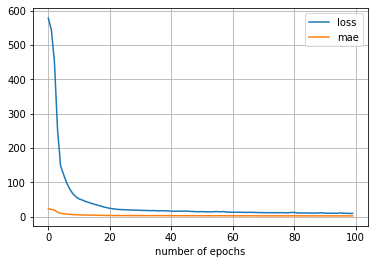

In [18]:
# 모델 학습 과정 시각화
import matplotlib.pyplot as plt
plt.plot(df.loss, label='loss')
plt.plot(df.mae, label='mae')
plt.xlabel('number of epochs')
plt.legend()
plt.grid()

In [21]:
# 모델 검증, 예측
y_pred = model.predict(X_test)
len(y_pred)

# r2_score로 성능평가
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2

4/4 [==============================] - 0s 7ms/step


0.8465739976453618

In [12]:
# 훈련 데이터의 손실함수값과 검증 데이터의 손실함수값을 에포크별로 비교하여 시각화

